<center>
<a href="https://exed.polytechnique.edu/fr" ><img src="https://exed.polytechnique.edu/sites/all/themes/college/images/logo.png" style="float:left; max-width: 360px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>

</center>

# [Scénarios d'Apprentissage Statistique] 

# groupe 8


# GRC: Score d'appétence d'un produit bancaire  en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-learn"/></a>

#### Résumé
Les données sont composées de 825 clients d'une banque décrits par 32 variables concernant leurs avoirs, et utilisations de leurs comptes. Le premier objectif est une exploration du jeu de données, une segmentation ou profilage des types de comportement des clients, le 2ème consiste à estimer puis prévoir un *score d'appétence* pour un produit bancaie, ici la carte visa premier. Comparaison des différentes méthodes et algorihtmes d'apprentissage pour atteindre cet objectif de la régression logistique au *boosting* (*extrem gradient*) en passant par les arbres, les SVM ou random forest. Une procédure de validation croisée généralisée est itérée sur une selection de ces méthodes. Celles d'agrégation de modèles conduisent aux meilleurs résultats. 

## Introduction


### Présentation des données
#### Les variables
La liste des variables est issue d'une base de données retraçant l'historique mensuel bancaire et les caractéristiques de tous les clients. Un sondage a été réalisé afin d'alléger les traitements ainsi qu'une première sélection de variables. Les variables contenues dans le fichier initial sont décrites dans le tableau ci-dessous. Elles sont observées sur 1425 clients.

*Tableau: Liste des variables initiales et de leur libellé* Attention, certains sont écrits en majuscules dans les programmes puis en minuscules après transfomation des données (logarithme, recodage) au cours d ela phase d'exploration. Les noms des variables logarithmes des variables quantitatives se terminent par `L`les variables qualitatives se terminent par `Q`ou `q`. 

**Identifiant** | **Libellé**
           --|--
`sexeq` | Sexe (qualitatif) 
`ager` | Age en années
`famiq` | Situation familiale: `Fmar Fcel Fdiv Fuli Fsep Fveu`
`relat` | Ancienneté de relation en mois
`pcspq` | Catégorie socio-professionnelle (code num)
`opgnb` | Nombre d'opérations par guichet dans le mois
`moyrv` | Moyenne des mouvements nets créditeurs des 3 mois en Kf
`tavep` | Total des avoirs épargne monétaire en francs
`endet` | Taux d'endettement
`gaget` | Total des engagements en francs
`gagec` | Total des engagements court terme en francs
`gagem` | Total des engagements moyen terme en francs
`kvunb` | Nombre de comptes à vue
`qsmoy` | Moyenne des soldes moyens sur 3 mois
`qcred` | Moyenne des mouvements créditeurs en Kf
`dmvtp` | Age du dernier mouvement (en jours)\hline
`boppn` | Nombre d'opérations à M-1
`facan` | Montant facturé dans l'année en francs
`lgagt` | Engagement long terme
`vienb` | Nombre de produits contrats vie
`viemt` | Montant des produits contrats vie en francs
`uemnb` | Nombre de produits épargne monétaire
`xlgnb` | Nombre de produits d'épargne logement
`xlgmt` | Montant des produits d'épargne logement en francs
`ylvnb` | Nombre de comptes sur livret
`ylvmt` | Montant des comptes sur livret en francs
`rocnb` | Nombre de paiements par carte bancaire à M-1
`nptag` | Nombre de cartes point argent
`itavc` | Total des avoirs sur tous les comptes
`havef` | Total des avoirs épargne financière en francs
`jnbjd | Nombre de jours à débit à M
**`carvp`** | **Possession de la carte VISA Premier**

#### Remarque importante: 


<center>
<img src="http://www.cmap.polytechnique.fr/~aymeric.dieuleveut/papers/This-is-ML-pipe" style="float:left; max-width: 600px; display: inline" alt="INSA"/></center>
<br>


Voir par exemple: https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7


## Librairies

In [ ]:
pip install dataprep

In [247]:
pip install catboost

In [248]:
pip install shap

In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dataprep.eda import plot, plot_missing, plot_correlation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV # Create the parameter grid : gbm_param_grid 
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import catboost as cb
from catboost import Pool, cv
import shap

## Import du fichier et analyse exploratoire

In [250]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [251]:

data = pd.read_csv('/content/drive/MyDrive/COURS_ML/X executive ML/X_5/vispremv.txt', sep=" ")
# data = pd.read_csv('/content/drive/My Drive/vispremv.txt', sep=" ")

In [252]:
data.head(5)

SEXEQ FAMIQ PCSPQ kvunbq  ...     ITAVCL     HAVEFL    JNBJDL CARVP
148009  Shom  Fcou  Pint     K1  ...  14.080718  13.230263  0.693147  Coui
552427  Shom  Fcou  Pint     K0  ...  11.717872   0.000000  0.000000  Coui
556005  Shom  Fseu  Psan     K0  ...  11.329303   0.000000  0.000000  Coui
556686  Shom  Fseu  Pouv     K0  ...  13.111856   9.972267  2.772589  Coui
642680  Shom  Fcou  Pint     K0  ...  11.304904   0.000000  1.386294  Coui

[5 rows x 54 columns]

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 148009 to 7589439
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEXEQ   1063 non-null   object 
 1   FAMIQ   1063 non-null   object 
 2   PCSPQ   1063 non-null   object 
 3   kvunbq  1063 non-null   object 
 4   vienbq  1063 non-null   object 
 5   uemnbq  1063 non-null   object 
 6   xlgnbq  1063 non-null   object 
 7   ylvnbq  1063 non-null   object 
 8   rocnbq  1063 non-null   object 
 9   nptagq  1063 non-null   object 
 10  endetq  1063 non-null   object 
 11  gagetq  1063 non-null   object 
 12  facanq  1063 non-null   object 
 13  lgagtq  1063 non-null   object 
 14  havefq  1063 non-null   object 
 15  jnbjdq  1063 non-null   object 
 16  ageq    1063 non-null   object 
 17  relatq  1063 non-null   object 
 18  qsmoyq  1063 non-null   object 
 19  opgnbq  1063 non-null   object 
 20  moyrvq  1063 non-null   object 
 21  tavepq  1063 non-null   objec

In [254]:
data.isnull().any()
data.isnull().sum()

SEXEQ     0
FAMIQ     0
PCSPQ     0
kvunbq    0
vienbq    0
uemnbq    0
xlgnbq    0
ylvnbq    0
rocnbq    0
nptagq    0
endetq    0
gagetq    0
facanq    0
lgagtq    0
havefq    0
jnbjdq    0
ageq      0
relatq    0
qsmoyq    0
opgnbq    0
moyrvq    0
tavepq    0
dmvtpq    0
boppnq    0
itavcq    0
RELAT     0
AGER      0
OPGNBL    0
MOYRVL    0
TAVEPL    0
ENDETL    0
GAGETL    0
GAGECL    0
GAGEML    0
KVUNB     0
QSMOY     0
QCREDL    0
DMVTPL    0
BOPPNL    0
FACANL    0
LGAGTL    0
VIENB     0
VIEMTL    0
UEMNB     0
XLGNB     0
XLGMTL    0
YLVNB     0
YLVMTL    0
ROCNB     0
NPTAG     0
ITAVCL    0
HAVEFL    0
JNBJDL    0
CARVP     0
dtype: int64

In [255]:
data.shape

(1063, 54)

In [256]:
data.describe

<bound method NDFrame.describe of         SEXEQ FAMIQ PCSPQ kvunbq  ...     ITAVCL     HAVEFL    JNBJDL CARVP
148009   Shom  Fcou  Pint     K1  ...  14.080718  13.230263  0.693147  Coui
552427   Shom  Fcou  Pint     K0  ...  11.717872   0.000000  0.000000  Coui
556005   Shom  Fseu  Psan     K0  ...  11.329303   0.000000  0.000000  Coui
556686   Shom  Fseu  Pouv     K0  ...  13.111856   9.972267  2.772589  Coui
642680   Shom  Fcou  Pint     K0  ...  11.304904   0.000000  1.386294  Coui
...       ...   ...   ...    ...  ...        ...        ...       ...   ...
7567726  Sfem  Fcou  Psan     K0  ...   0.000000   0.000000  0.000000  Cnon
7572458  Sfem  Fcou  Pint     K0  ...   9.276690   0.000000  0.000000  Cnon
7574479  Sfem  Fcou  Pouv     K0  ...  11.056225   0.000000  2.302585  Cnon
7580358  Sfem  Fseu  Psan     K0  ...  10.236310   0.000000  3.663562  Cnon
7589439  Sfem  Fcou  Pint     K0  ...   9.080915   0.000000  0.000000  Cnon

[1063 rows x 54 columns]>

In [257]:
data.dtypes.value_counts()

object     26
float64    18
int64      10
dtype: int64


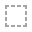
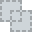
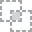
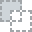
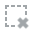
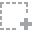
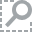
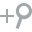
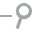
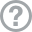
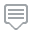
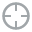
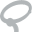
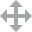
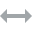
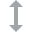
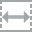
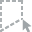
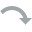
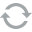
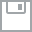
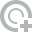
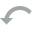
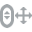
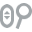
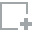
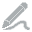
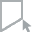
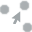
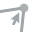
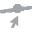

In [258]:
plot(data)

In [259]:
data.nunique()

SEXEQ       2
FAMIQ       2
PCSPQ       5
kvunbq      2
vienbq      2
uemnbq      3
xlgnbq      3
ylvnbq      3
rocnbq      2
nptagq      2
endetq      2
gagetq      2
facanq      2
lgagtq      2
havefq      2
jnbjdq      3
ageq        3
relatq      3
qsmoyq      3
opgnbq      3
moyrvq      3
tavepq      3
dmvtpq      3
boppnq      3
itavcq      3
RELAT     310
AGER       48
OPGNBL     23
MOYRVL    134
TAVEPL    700
ENDETL     62
GAGETL    438
GAGECL    219
GAGEML    230
KVUNB       5
QSMOY     930
QCREDL    117
DMVTPL     63
BOPPNL    112
FACANL    209
LGAGTL    142
VIENB       7
VIEMTL    176
UEMNB       8
XLGNB       5
XLGMTL    413
YLVNB       5
YLVMTL    518
ROCNB      55
NPTAG       4
ITAVCL    981
HAVEFL    269
JNBJDL     94
CARVP       2
dtype: int64


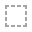
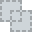
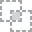
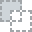
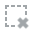
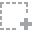
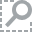
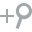
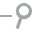
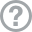
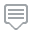
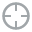
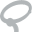
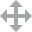
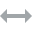
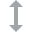
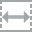
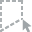
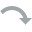
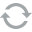
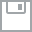
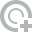
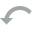
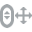
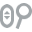
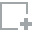
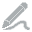
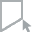
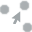
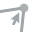
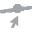

In [260]:
plot_missing(data)


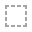
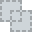
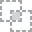
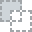
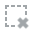
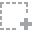
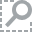
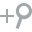
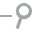
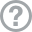
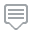
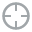
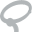
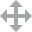
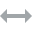
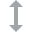
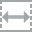
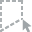
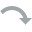
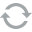
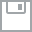
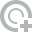
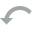
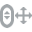
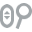
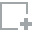
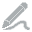
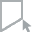
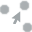
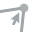
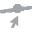

In [261]:
plot_correlation(data)


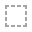
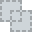
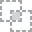
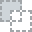
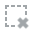
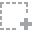
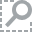
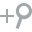
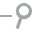
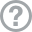
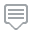
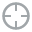
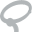
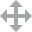
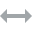
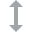
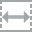
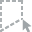
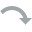
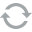
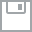
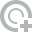
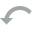
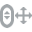
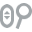
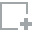
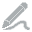
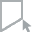
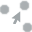
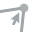
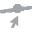

In [262]:
plot_correlation(data, "AGER")

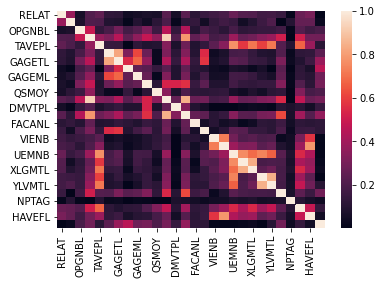

In [263]:
sns.heatmap(np.abs(data.iloc[:,0:53].corr()));

In [264]:
# sns.pairplot(data);

## Preprocessing : création des échantillons train / test, normalisation des données

In [265]:
X = pd.get_dummies(data.iloc[:,:53])
X.shape

(1063, 94)

In [266]:
X.head()

RELAT  AGER    OPGNBL  ...  itavcq_I0  itavcq_I1  itavcq_I2
148009    238    51  0.000000  ...          0          0          1
552427    139    58  0.000000  ...          0          0          1
556005     99    27  0.000000  ...          0          0          1
556686     89    49  0.000000  ...          0          0          1
642680    216    64  1.791759  ...          0          0          1

[5 rows x 94 columns]

In [267]:
y = data.CARVP
y.replace(['Cnon', 'Coui'], [0, 1], inplace = True)
y.head()

148009    1
552427    1
556005    1
556686    1
642680    1
Name: CARVP, dtype: int64

In [268]:
scaler = StandardScaler()
scaler.fit(X)
X_scaler = scaler.transform(X)

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=5)

In [270]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.head()

RELAT      AGER    OPGNBL  ...  itavcq_I0  itavcq_I1  itavcq_I2
0  1.844991  0.371735 -0.915646  ...  -0.708105   1.415212  -0.706608
1  0.657265 -0.300153  0.688185  ...  -0.708105   1.415212  -0.706608
2 -1.086875 -1.643930 -0.915646  ...  -0.708105   1.415212  -0.706608
3  0.732166  0.119777 -0.915646  ...  -0.708105   1.415212  -0.706608
4  0.175754  0.119777  0.096259  ...  -0.708105  -0.706608   1.415212

[5 rows x 94 columns]

In [271]:
print(X_train.shape)
print(y_train.shape)

(850, 94)
(850,)


In [272]:
X_test = pd.DataFrame(X_test, columns=X.columns)
X_test.head()

RELAT      AGER    OPGNBL  ...  itavcq_I0  itavcq_I1  itavcq_I2
0 -0.081052  1.463554 -0.915646  ...   1.412220  -0.706608  -0.706608
1  0.582363 -0.552112  0.096259  ...  -0.708105   1.415212  -0.706608
2 -0.380659 -1.391972  1.108163  ...  -0.708105  -0.706608   1.415212
3  1.406281  1.463554  0.096259  ...  -0.708105   1.415212  -0.706608
4 -0.091752  1.799498  0.096259  ...  -0.708105  -0.706608   1.415212

[5 rows x 94 columns]

In [273]:

print(X_test.shape)
print(y_test.shape)

(213, 94)
(213,)


## KMeans

In [274]:
# Algorithme de K-means
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_train)
print(kmeans.labels_)
#print(kmeans.cluster_centers_)

# Centroïdes et labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

[0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1
 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0
 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1
 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0
 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0
 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0
 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0
 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1
 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1
 0 1 1 1 0 0 1 1 0 1 0 0 

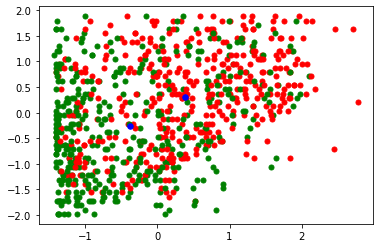

In [275]:
# Visualisation des clusters et des centroïdes

# Liste des couleurs
colors = ["g.", "r."]

# Graphique du nuage de points attribués au cluster correspondant
for i in range(len(X_train)):
    plt.plot(X_train.iloc[i,0], X_train.iloc[i,1], colors[labels[i]], markersize = 10)

# Graphique des centroïdes
plt.scatter(centroids[:, 0], centroids[:, 1], marker = "o", s=30, color = "blue", linewidths = 1, zorder = 10)
plt.show()

## PCA

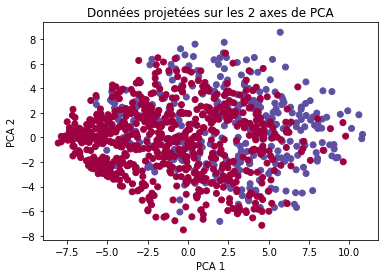

La part de variance expliquée est 0.27


In [276]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaler)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Spectral)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title("Données projetées sur les 2 axes de PCA")
plt.show();

print("La part de variance expliquée est", round(pca.explained_variance_ratio_.sum(),2))

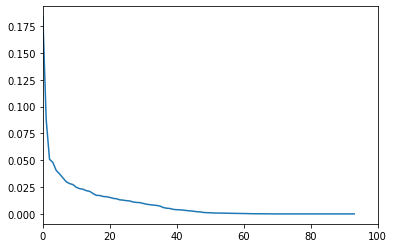

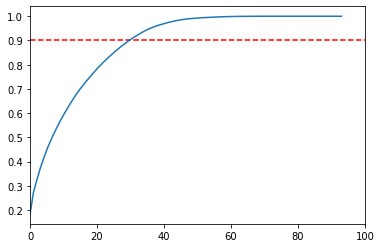

In [277]:
pca = PCA()
pca.fit(X_scaler)

plt.figure()
plt.xlim(0,100)
plt.plot(pca.explained_variance_ratio_);

plt.figure()
plt.xlim(0,100)
plt.axhline(y = 0.9, color ='r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum());

=> Il faut environ environ 30 composantes principales pour obtenir 90% de variance expliquée

In [278]:
pca = PCA(n_components = 0.9)
pca.fit(X_scaler)
print("Nombre de composantes retenu :", pca.n_components_)
print("La part de variance expliquée est", round(pca.explained_variance_ratio_.sum(),2))

Nombre de composantes retenu : 31
La part de variance expliquée est 0.9


# Classification supervisée par arbre de décision

In [279]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [280]:
# Validation croisée
scores = cross_val_score(tree, X_test, y_test, cv=10)
print("Moyenne des scores sur l'échantillon de test :", scores.mean())
print("Moyenne des scores sur l'échantillon de test :", scores.std())

Moyenne des scores sur l'échantillon de test : 0.7885281385281384
Moyenne des scores sur l'échantillon de test : 0.0859012892942133


In [281]:
y_pred = tree.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite    0   1
Classe réelle          
0               142   4
1                15  52

In [282]:
# F-mesure
print("Score_f1 :", f1_score(y_test, y_pred))

Score_f1 : 0.8455284552845529


In [283]:
predictions = (tree.predict(X_test) > 0.5).astype('int32')
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       146
           1       0.93      0.78      0.85        67

    accuracy                           0.91       213
   macro avg       0.92      0.87      0.89       213
weighted avg       0.91      0.91      0.91       213



## Algorithme de bagging

In [284]:
bc = BaggingClassifier(base_estimator = tree, n_estimators = 400)
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

In [285]:
# Validation croisée
scores = cross_val_score(bc, X_test, y_test, cv=10)
print("Moyenne des scores sur l'échantillon de test :", scores.mean())
print("Moyenne des scores sur l'échantillon de test :", scores.std())

Moyenne des scores sur l'échantillon de test : 0.8354978354978355
Moyenne des scores sur l'échantillon de test : 0.06841333605748531


In [286]:
y_pred = bc.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite    0   1
Classe réelle          
0               143   3
1                18  49

In [287]:
# F-mesure
print("Score_f1 :", f1_score(y_test, y_pred))

Score_f1 : 0.8235294117647058


In [288]:
predictions = (bc.predict(X_test) > 0.5).astype('int32')
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       146
           1       0.94      0.73      0.82        67

    accuracy                           0.90       213
   macro avg       0.92      0.86      0.88       213
weighted avg       0.91      0.90      0.90       213



## Algorithme de boosting

In [289]:
ac = AdaBoostClassifier(base_estimator = tree, n_estimators = 400)
ac.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [290]:
# Validation croisée
scores = cross_val_score(ac, X_test, y_test, cv=10)
print("Moyenne des scores sur l'échantillon de test :", scores.mean())

Moyenne des scores sur l'échantillon de test : 0.8880952380952382


In [291]:
y_pred = ac.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite    0   1
Classe réelle          
0               141   5
1                10  57

In [292]:
# F-mesure
print("Score_f1 :", f1_score(y_test, y_pred))

Score_f1 : 0.883720930232558


In [293]:
predictions = (ac.predict(X_test) > 0.5).astype('int32')
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       146
           1       0.92      0.85      0.88        67

    accuracy                           0.93       213
   macro avg       0.93      0.91      0.92       213
weighted avg       0.93      0.93      0.93       213



## 1er algorithme CatBoost

In [ ]:
model_catboost = cb.CatBoostClassifier(iterations=200,task_type = 'GPU')

# Instantiate the regressor : gbm
gbm_param_grid = {'learning_rate': [0.03, 0.1],
                  'depth': [4, 6, 10],
                  'l2_leaf_reg': [1, 3, 5, 7, 9]}

# Perform random search : grid_mse
randomized_mse = RandomizedSearchCV(estimator=model_catboost,
                                    param_distributions=gbm_param_grid,
                                    scoring='neg_mean_squared_error',
                                    n_iter=20,
                                    verbose=True,
                                    n_jobs=-1,
                                    cv=4)

# Fit randomized_mse to the data
randomized_mse.fit(X_train, y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)

In [ ]:
# Initialize CatBoostClassifier
# Best parameters found : {'learning_rate': 0.03, 'l2_leaf_reg': 1, 'depth': 4}
model_catboost = cb.CatBoostClassifier(
                           learning_rate=0.03,
                           l2_leaf_reg= 1,
                           iterations= 200, 
                           depth=4,
                           task_type = 'GPU')
# Fit model
from catboost import CatBoostClassifier # Or CatBoostRegressor
model_catboost = CatBoostClassifier()
model_catboost.fit(X_train, y_train, plot="True", eval_set=(X_test, y_test))

In [296]:
model_catboost.score(X_test, y_test)

0.9483568075117371

In [297]:
y_pred = model_catboost.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite    0   1
Classe réelle          
0               144   2
1                 9  58

In [298]:
f1_score(y_test, y_pred)

0.9133858267716535

In [299]:
predictions = (model_catboost.predict(X_test) > 0.5).astype('int32')
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       146
           1       0.97      0.87      0.91        67

    accuracy                           0.95       213
   macro avg       0.95      0.93      0.94       213
weighted avg       0.95      0.95      0.95       213



In [300]:
# Validation croisée
scores = cross_val_score(model_catboost, X_test, y_test, cv=10)
print("Moyenne des scores sur l'échantillon de test :", scores.mean())
print("Moyenne des scores sur l'échantillon de test :", scores.std())

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
6:	learn: 0.6668110	total: 27.1ms	remaining: 3.84s
7:	learn: 0.6636325	total: 31.1ms	remaining: 3.86s
8:	learn: 0.6605984	total: 35.1ms	remaining: 3.86s
9:	learn: 0.6574894	total: 39ms	remaining: 3.86s
10:	learn: 0.6537314	total: 43ms	remaining: 3.87s
11:	learn: 0.6498723	total: 47.1ms	remaining: 3.88s
12:	learn: 0.6473818	total: 48.2ms	remaining: 3.66s
13:	learn: 0.6439108	total: 52.3ms	remaining: 3.68s
14:	learn: 0.6408376	total: 56.3ms	remaining: 3.69s
15:	learn: 0.6375631	total: 60.3ms	remaining: 3.71s
16:	learn: 0.6338197	total: 64.3ms	remaining: 3.72s
17:	learn: 0.6304643	total: 68.2ms	remaining: 3.72s
18:	learn: 0.6262105	total: 72ms	remaining: 3.72s
19:	learn: 0.6216453	total: 76ms	remaining: 3.72s
20:	learn: 0.6188690	total: 79.9ms	remaining: 3.72s
21:	learn: 0.6151850	total: 83.9ms	remaining: 3.73s
22:	learn: 0.6117611	total: 87.7ms	remaining: 3.73s
23:	learn: 0.6084380	total: 91.6ms	remaining: 3.73

In [301]:
shap.initjs()

In [302]:
shap_values = model_catboost.get_feature_importance(cb.Pool(X_train, y_train), type='ShapValues')

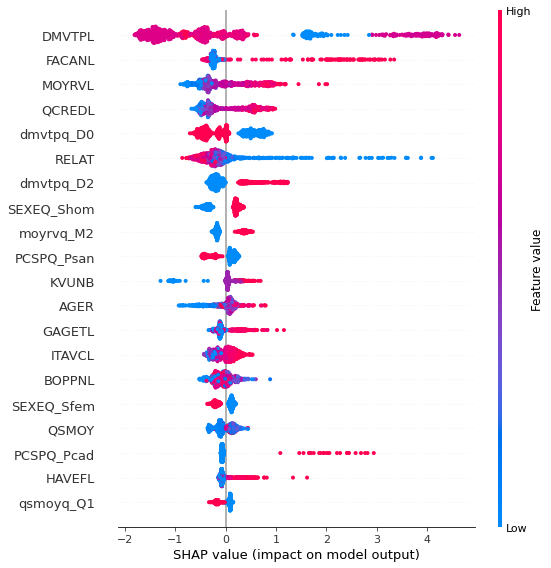

In [303]:
shap.summary_plot(shap_values[:,:-1], X_train)

### Variables les plus importantes dans le modèle :

1) DMVTP : Age du dernier mouvement (en jours)

2) FACAN : Montant facturé dans l'année en francs

3) MOYRV : Moyenne des mouvements nets créditeurs des 3 mois en Kf

4) QCRED : Moyenne des mouvements créditeurs en Kf

6) RELAT : Ancienneté de relation en mois

## 2ème algorithme CatBoost avec les catégories non traitées  (meilleur score_f1 obtenu : 0,915)

In [314]:
categorical_features_indices = np.where(data.iloc[:,:-1].dtypes != np.float)[0]
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2, random_state=5)

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

model_catboost = cb.CatBoostClassifier(
              iterations=300,
              cat_features=categorical_features_indices,
              eval_metric='Accuracy',
              task_type = 'GPU')

# Instantiate the regressor : gbm
gbm_param_grid = {'learning_rate': [0.03, 0.1,0.01,1],
        'depth': [3,4, 6, 5,10],
        'one_hot_max_size':[3,7, 6, 5,10,15,20],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

# Perform random search : grid_mse
randomized_mse = RandomizedSearchCV(estimator=model_catboost,
                                    param_distributions=gbm_param_grid,
                                    scoring='neg_mean_squared_error',
                                    n_iter=10,
                                    verbose=True,
                                    n_jobs=-1,
                                    cv=skf)

# Fit randomized_mse to the data
randomized_mse.fit(X_train, y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.7min finished


0:	learn: 0.7752941	total: 51.1ms	remaining: 15.3s
1:	learn: 0.7752941	total: 106ms	remaining: 15.7s
2:	learn: 0.7800000	total: 154ms	remaining: 15.3s
3:	learn: 0.7835294	total: 187ms	remaining: 13.8s
4:	learn: 0.8388235	total: 216ms	remaining: 12.8s
5:	learn: 0.8494118	total: 247ms	remaining: 12.1s
6:	learn: 0.8470588	total: 288ms	remaining: 12.1s
7:	learn: 0.8552941	total: 319ms	remaining: 11.6s
8:	learn: 0.8611765	total: 352ms	remaining: 11.4s
9:	learn: 0.8752941	total: 385ms	remaining: 11.2s
10:	learn: 0.8705882	total: 416ms	remaining: 10.9s
11:	learn: 0.8823529	total: 453ms	remaining: 10.9s
12:	learn: 0.8835294	total: 483ms	remaining: 10.7s
13:	learn: 0.8870588	total: 519ms	remaining: 10.6s
14:	learn: 0.8835294	total: 552ms	remaining: 10.5s
15:	learn: 0.8835294	total: 583ms	remaining: 10.4s
16:	learn: 0.8905882	total: 616ms	remaining: 10.2s
17:	learn: 0.8976471	total: 647ms	remaining: 10.1s
18:	learn: 0.8976471	total: 680ms	remaining: 10.1s
19:	learn: 0.8988235	total: 709ms	remain

In [315]:
# Initialize CatBoostClassifier
# Best parameters found : {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'depth': 3}
model_catboost = cb.CatBoostClassifier(
                           learning_rate=0.1,
                           l2_leaf_reg= 3,
                           iterations= 300,
                           one_hot_max_size=3,
                           cat_features=categorical_features_indices,eval_metric='Accuracy',
                           depth=6)

# model_cb = CatBoostClassifier(iterations=200,cat_features=categorical_features_indices,eval_metric='Accuracy')
model_catboost.fit(X_train, y_train, plot="True", eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8082353	test: 0.8215962	best: 0.8215962 (0)	total: 20.9ms	remaining: 6.24s
1:	learn: 0.8800000	test: 0.8826291	best: 0.8826291 (1)	total: 40ms	remaining: 5.97s
2:	learn: 0.8752941	test: 0.8826291	best: 0.8826291 (1)	total: 53ms	remaining: 5.25s
3:	learn: 0.8917647	test: 0.9107981	best: 0.9107981 (3)	total: 78.3ms	remaining: 5.79s
4:	learn: 0.8905882	test: 0.9061033	best: 0.9107981 (3)	total: 95.9ms	remaining: 5.66s
5:	learn: 0.8976471	test: 0.9154930	best: 0.9154930 (5)	total: 113ms	remaining: 5.52s
6:	learn: 0.8964706	test: 0.9061033	best: 0.9154930 (5)	total: 132ms	remaining: 5.53s
7:	learn: 0.8988235	test: 0.9061033	best: 0.9154930 (5)	total: 149ms	remaining: 5.44s
8:	learn: 0.9117647	test: 0.9295775	best: 0.9295775 (8)	total: 167ms	remaining: 5.41s
9:	learn: 0.9129412	test: 0.9248826	best: 0.9295775 (8)	total: 185ms	remaining: 5.38s
10:	learn: 0.9105882	test: 0.9201878	best: 0.9295775 (8)	total: 235ms	remaining: 6.16s
11:	learn: 0.9200000	test: 0.9248826	best: 0.9295775

In [316]:
y_pred_cat = model_catboost.predict(X_test)

In [317]:
f1_score(y_test, y_pred_cat)

0.923076923076923

In [322]:
print(classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       146
           1       0.95      0.90      0.92        67

    accuracy                           0.95       213
   macro avg       0.95      0.94      0.94       213
weighted avg       0.95      0.95      0.95       213



In [323]:
pd.crosstab(y_test, y_pred_cat, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite    0   1
Classe réelle          
0               143   3
1                 7  60

In [320]:
# Validation croisée
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
scores = cross_val_score(model_catboost, X_train, y_train, cv=skf)
print("Moyenne des scores sur l'échantillon de test :", scores.mean())
print("Moyenne des scores sur l'échantillon de test :", scores.std())

0:	learn: 0.8379085	total: 10.2ms	remaining: 3.05s
1:	learn: 0.8339869	total: 17ms	remaining: 2.53s
2:	learn: 0.8470588	total: 25.6ms	remaining: 2.54s
3:	learn: 0.8679739	total: 35.9ms	remaining: 2.65s
4:	learn: 0.8640523	total: 45.2ms	remaining: 2.67s
5:	learn: 0.8627451	total: 54.7ms	remaining: 2.68s
6:	learn: 0.8928105	total: 63.1ms	remaining: 2.64s
7:	learn: 0.9006536	total: 73ms	remaining: 2.67s
8:	learn: 0.9071895	total: 81.9ms	remaining: 2.65s
9:	learn: 0.9098039	total: 93.5ms	remaining: 2.71s
10:	learn: 0.9058824	total: 96.4ms	remaining: 2.53s
11:	learn: 0.9098039	total: 105ms	remaining: 2.53s
12:	learn: 0.9137255	total: 114ms	remaining: 2.52s
13:	learn: 0.9163399	total: 124ms	remaining: 2.52s
14:	learn: 0.9176471	total: 133ms	remaining: 2.53s
15:	learn: 0.9254902	total: 148ms	remaining: 2.63s
16:	learn: 0.9307190	total: 158ms	remaining: 2.63s
17:	learn: 0.9333333	total: 167ms	remaining: 2.62s
18:	learn: 0.9346405	total: 176ms	remaining: 2.6s
19:	learn: 0.9359477	total: 185ms	r

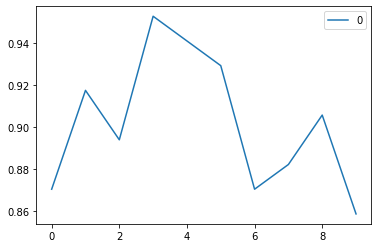

In [321]:
pd.DataFrame(scores).plot()

In [ ]:
cv_dataset = Pool(data=data.iloc[:,:-1], 
                  label=data.iloc[:,-1],
                  cat_features=categorical_features_indices)

params = {"iterations": 200,
          "depth": 3,
          "learning_rate":0.1,
          "loss_function": "CrossEntropy",
          "verbose": False,
          "l2_leaf_reg": 1}

scores = cv(cv_dataset,
            params,
            fold_count=5)
scores

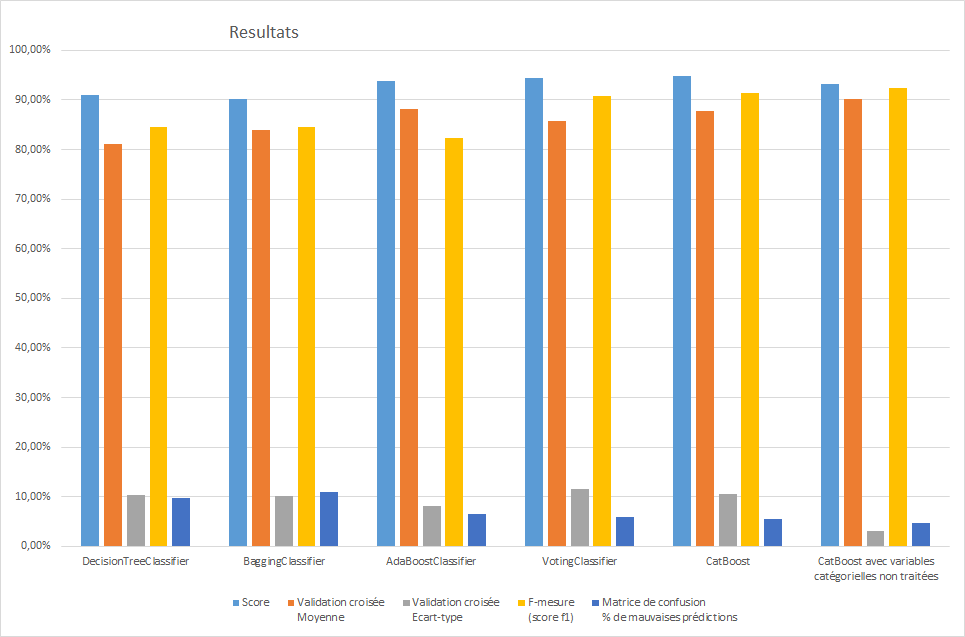